# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
print(pyber_data_df['type'].unique())
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df["ride_id"].count()
suburban_cities_df["ride_id"].count()
urban_cities_df["ride_id"].count()
pyber_data_df.groupby(["type"]).count()["ride_id"]

['Urban' 'Suburban' 'Rural']


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type

city_data_df.groupby(["type"]).sum()["driver_count"]

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
pyber_data_df.groupby(["type"]).sum()["fare"]


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.mean()
rural_avg_fare.mean()
suburban_avg_fare.mean()
pyber_data_df.groupby(["type"]).mean()["fare"]

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
suburban_driver_count = suburban_cities_df.groupby(["type"]).sum()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["type"]).sum()["driver_count"]
urban_driver_count = urban_cities_df.groupby(["type"]).sum()["driver_count"]
pyber_data_df.groupby(["type"]).mean()["fare"]

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 

total_drivers = pyber_data_df.groupby(["type"]).count()["driver_count"]
total_rides = city_data_df.groupby(["type"]).sum()["driver_count"]
average_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
average_fare_per_driver = total_fares / total_rides 



pyber_summary_df = pd.DataFrame({
          "Total drivers" : total_drivers,
          "Total rides": total_rides,
          "Total Fares": total_fares,
          "Average Fare per Ride": average_fare_per_ride,
          "Average fare per driver": average_fare_per_driver,
            })

pyber_summary_df


,Total drivers,Total rides,Total Fares,Average Fare per Ride,Average fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total drivers,Total rides,Total Fares,Average Fare per Ride,Average fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.


total_drivers = pyber_data_df.groupby(["type"]).count()["driver_count"].map("{:,.0f}".format)
total_rides = city_data_df.groupby(["type"]).sum()["driver_count"].map("{:,.0f}".format)
average_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"].map("${:,.2f}".format)
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"].map("${:,.2f}".format)
average_fare_per_driver = (pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]).map("${:.2f}".format)



pyber_summary_df = pd.DataFrame({
          "Total drivers" : total_drivers,
          "Total rides": total_rides,
          "Total Fares": total_fares,
          "Average Fare per Ride": average_fare_per_ride,
          "Average fare per driver": average_fare_per_driver,
            })

pyber_summary_df.index.name = None
pyber_summary_df


,Total drivers,Total rides,Total Fares,Average Fare per Ride,Average fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df['date'] = pd.to_datetime(pyber_data_df.date)
pyber_data_df['date'] = pyber_data_df['date'].dt.strftime('%y-%m-%d')
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'], format='%y-%m-%d')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07,44.94,4256853490277,4,Rural


In [12]:
new_df = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]



In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_df = new_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df1_pivot = new_df.pivot(index = "date", columns = "type", values = "fare")
df1_pivot.head(100)


type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-06,45.31,158.25,378.57
2019-04-07,60.49,191.97,282.16
2019-04-08,55.19,138.46,124.10


In [35]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas

# Below are quick example
start_date = '2019-01-01'
end_date = '2019-04-29'
# Select DataFrame rows between two dates
search = (df1_pivot.index >= start_date) & (df1_pivot.index <= end_date)
df1_pivot = df1_pivot.loc[search]
df1_pivot.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
2019-01-06,47.33,62.63,202.40
2019-01-07,NaN,155.01,218.02
2019-01-08,19.39,56.82,379.79
2019-01-09,31.84,150.67,231.34


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

#see line 11


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
df1_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [36]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#https://www.geeksforgeeks.org/python-pandas-dataframe-resample/
df1_pivot_sum = df1_pivot.resample('W').sum()
rural_data = df1_pivot.Rural.resample('W').sum()
sub_data = df1_pivot.Suburban.resample('W').sum()
urban_data = df1_pivot.Urban.resample('W').sum()

df1_pivot_sum.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


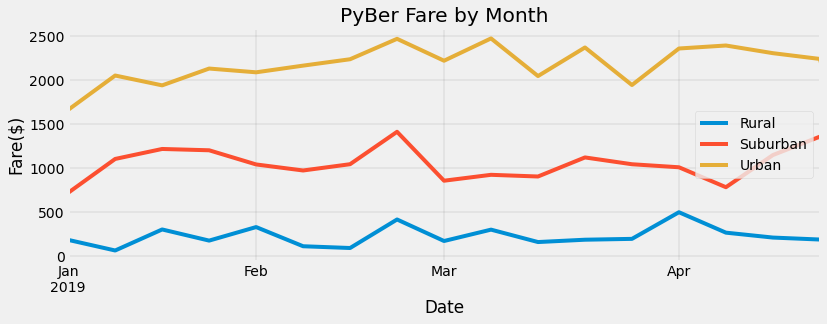

In [34]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
plt.style.use('fivethirtyeight')
df1_pivot_sum.plot.line(figsize=(12, 4))
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.xlim(['2019-01-01', '2019-04-28'])
# Create a title.
plt.title("PyBer Fare by Month")
#plt grid
plt.grid(color = 'black', linestyle = '-', linewidth = .1)
# Add the legend.
plt.legend()

